The objective is to analyze the flight
booking dataset obtained from a
platform which is used to book flight
tickets. A thorough study of the data
will aid in the discovery of valuable
insights that will be of enormous
value to passengers. Apply EDA,
statistical methods and Machine
learning algorithms in order to get
meaningful information from it.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Flight_Booking.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.shape

(300153, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

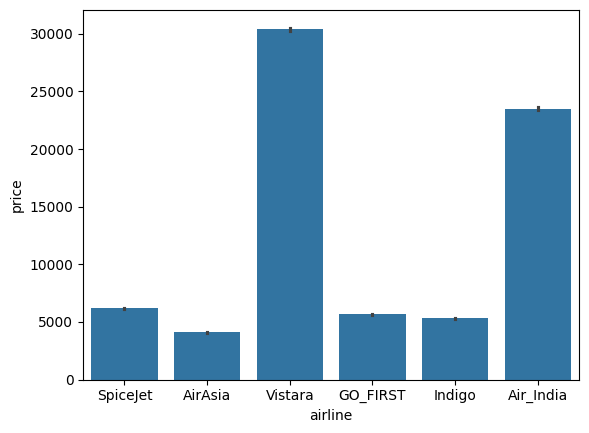

In [ ]:
# prompt: make a barplot between variation of airline and price

sns.barplot(x = 'airline', y = 'price', data = data)
plt.show()


In [ ]:
# prompt: to analysis of the above barblot

# Calculate the average price for each airline
average_prices = data.groupby('airline')['price'].mean()

# Print the average prices
print(average_prices)

# Identify the airline with the highest average price
most_expensive_airline = average_prices.sort_values(ascending=False).index[0]

# Print the most expensive airline
print(f"The most expensive airline is {most_expensive_airline} with an average price of {average_prices[most_expensive_airline]}")

# Identify the airline with the lowest average price
least_expensive_airline = average_prices.sort_values().index[0]

# Print the least expensive airline
print(f"The least expensive airline is {least_expensive_airline} with an average price of {average_prices[least_expensive_airline]}")

# Further analysis could include:

# - Investigating the relationship between price and other factors such as day of the week, time of day, and month of the year.
# - Identifying any outliers in the data.
# - Using the data to build a model to predict flight prices.


airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64
The most expensive airline is Vistara with an average price of 30396.53630170735
The least expensive airline is AirAsia with an average price of 4091.0727419555224


class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64
The most expensive class is Business with an average price of 52540.08112357868
The least expensive class is Economy with an average price of 6572.342383362527


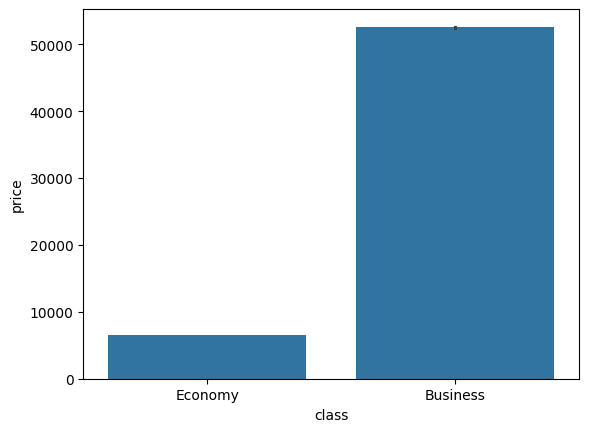

In [ ]:
# Calculate the average price for each class
average_prices_by_class = data.groupby('class')['price'].mean()

# Print the average prices for each class
print(average_prices_by_class)

# Identify the class with the highest average price
most_expensive_class = average_prices_by_class.sort_values(ascending=False).index[0]

# Print the most expensive class
print(f"The most expensive class is {most_expensive_class} with an average price of {average_prices_by_class[most_expensive_class]}")

# Identify the class with the lowest average price
least_expensive_class = average_prices_by_class.sort_values().index[0]

# Print the least expensive class
print(f"The least expensive class is {least_expensive_class} with an average price of {average_prices_by_class[least_expensive_class]}")

# Visualize the relationship between class and price
sns.barplot(x = 'class', y = 'price', data = data)
plt.show()


In [ ]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


duration_hours
0.013833     1973.56
0.015333     2003.54
0.016667     2266.06
0.018000     2589.31
0.019500     2632.21
              ...   
0.741667    32439.00
0.763833    25851.33
0.784667    17223.00
0.795833    31291.50
0.830500    20714.50
Name: price, Length: 476, dtype: float64
The most expensive duration is 0.5333333333333333 hours with an average price of 55228.66
The least expensive duration is 0.013833333333333333 hours with an average price of 1973.56


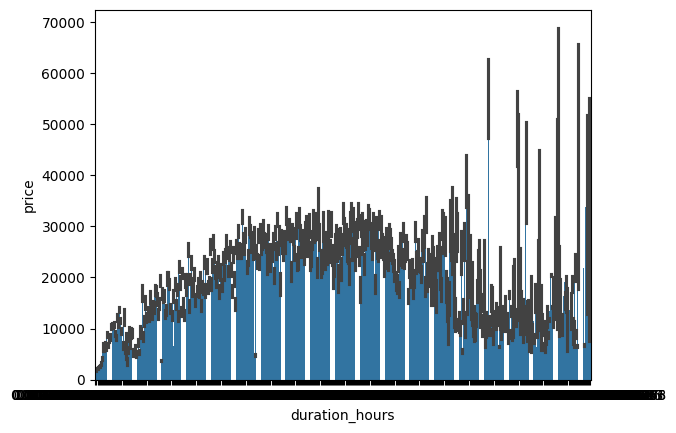

In [ ]:
#

# Calculate the duration of each flight in hours
data['duration_hours'] = data['duration'] / 60

# Calculate the average price for each duration
average_prices_by_duration = data.groupby('duration_hours')['price'].mean().round(2)

# Print the average prices for each duration
print(average_prices_by_duration)

# Identify the duration with the highest average price
most_expensive_duration = average_prices_by_duration.sort_values(ascending=False).index[0]

# Print the most expensive duration
print(f"The most expensive duration is {most_expensive_duration} hours with an average price of {average_prices_by_duration[most_expensive_duration]}")

# Identify the duration with the lowest average price
least_expensive_duration = average_prices_by_duration.sort_values().index[0]

# Print the least expensive duration
print(f"The least expensive duration is {least_expensive_duration} hours with an average price of {average_prices_by_duration[least_expensive_duration]}")

# Visualize the relationship between duration and price
sns.barplot(x = 'duration_hours', y = 'price', data = data)
plt.show()


stops
one            22900.99
two_or_more    14113.45
zero            9375.94
Name: price, dtype: float64
The most expensive number of stops is one with an average price of 22900.99
The least expensive number of stops is zero with an average price of 9375.94


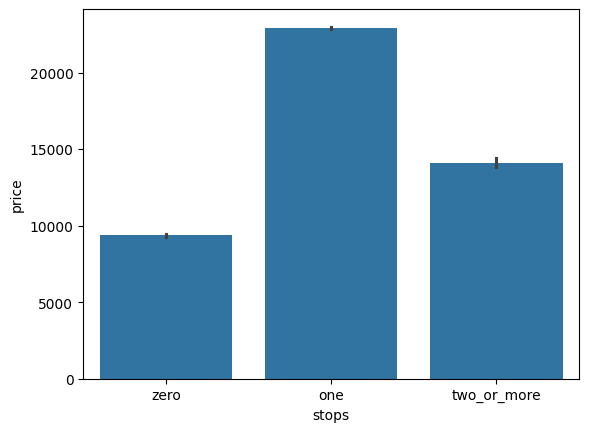

In [ ]:

# Calculate the average price for each number of stops
average_prices_by_stops = data.groupby('stops')['price'].mean().round(2)

# Print the average prices for each number of stops
print(average_prices_by_stops)

# Identify the number of stops with the highest average price
most_expensive_stops = average_prices_by_stops.sort_values(ascending=False).index[0]

# Print the most expensive number of stops
print(f"The most expensive number of stops is {most_expensive_stops} with an average price of {average_prices_by_stops[most_expensive_stops]}")

# Identify the number of stops with the lowest average price
least_expensive_stops = average_prices_by_stops.sort_values().index[0]

# Print the least expensive number of stops
print(f"The least expensive number of stops is {least_expensive_stops} with an average price of {average_prices_by_stops[least_expensive_stops]}")

# Visualize the relationship between stops and price
sns.barplot(x = 'stops', y = 'price', data = data)
plt.show()


<ipython-input-41-6845ff128d52>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline', data=data, palette='CMRmap')
<ipython-input-41-6845ff128d52>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source_city', data=data, palette='coolwarm')
<ipython-input-41-6845ff128d52>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='departure_time', data=data, palette='magma')
<ipython-input-41-6845ff128d52>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

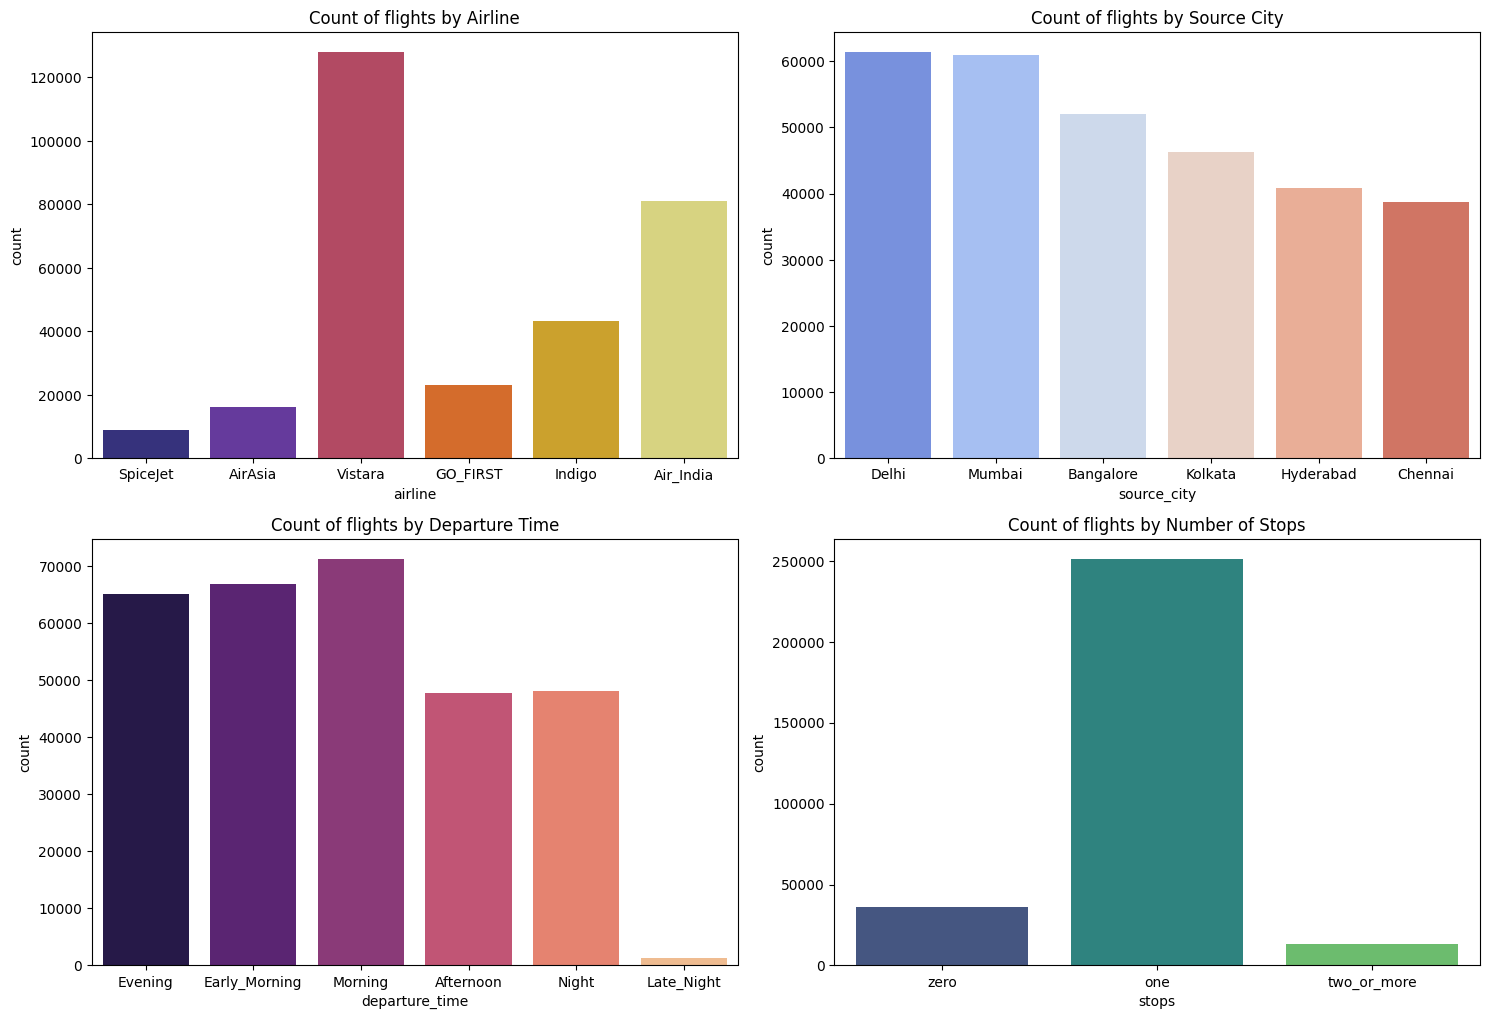

In [ ]:
#
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='airline', data=data, palette='CMRmap')
plt.title('Count of flights by Airline')

plt.subplot(4, 2, 2)
sns.countplot(x='source_city', data=data, palette='coolwarm')
plt.title('Count of flights by Source City')

plt.subplot(4, 2, 3)
sns.countplot(x='departure_time', data=data, palette='magma')
plt.title('Count of flights by Departure Time')

plt.subplot(4, 2, 4)
sns.countplot(x='stops', data=data, palette='viridis')
plt.title('Count of flights by Number of Stops')

plt.tight_layout()
plt.show()


<ipython-input-42-df182d4ce0b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='plasma')
<ipython-input-42-df182d4ce0b0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='destination_city', data=data, palette='rainbow')


Text(0.5, 1.0, 'Count of flights by Destination City')

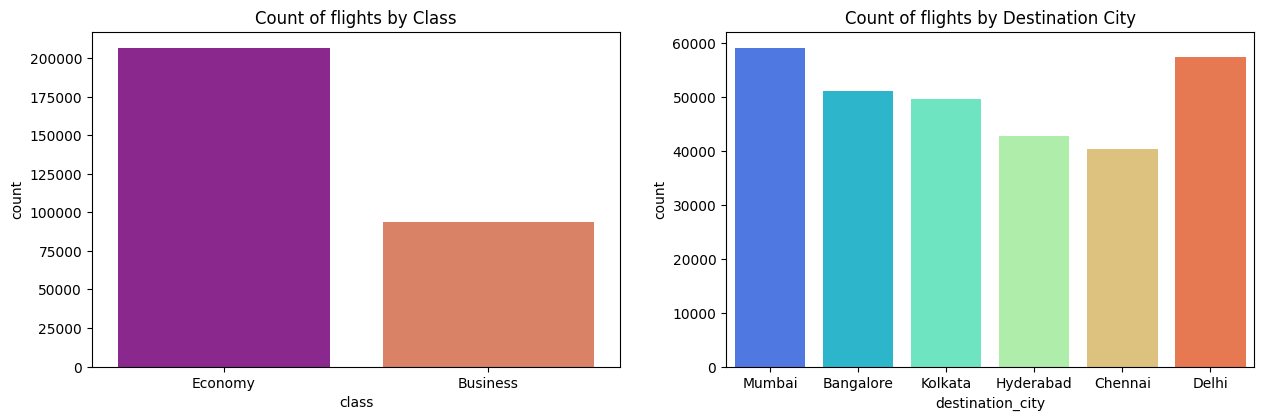

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='class', data=data, palette='plasma')
plt.title('Count of flights by Class')

plt.subplot(4, 2, 2)
sns.countplot(x='destination_city', data=data, palette='rainbow')
plt.title('Count of flights by Destination City')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['airline'] = le.fit_transform(data['airline'])
data['source_city'] = le.fit_transform(data['source_city'])
data['destination_city'] = le.fit_transform(data['destination_city'])
data['departure_time'] = le.fit_transform(data['departure_time'])
data['class'] = le.fit_transform(data['class'])
data['stops'] = le.fit_transform(data['stops'])
data['arrival_time'] = le.fit_transform(data['arrival_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  duration_hours    300153 non-null  float64
dtypes: float64(2), int64(9), object(1)
memory usage: 27.5+ MB


In [ ]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_hours
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953,0.036167
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953,0.038833
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956,0.036167
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955,0.037500
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955,0.038833


In [ ]:
data['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

### **Feature Selection**

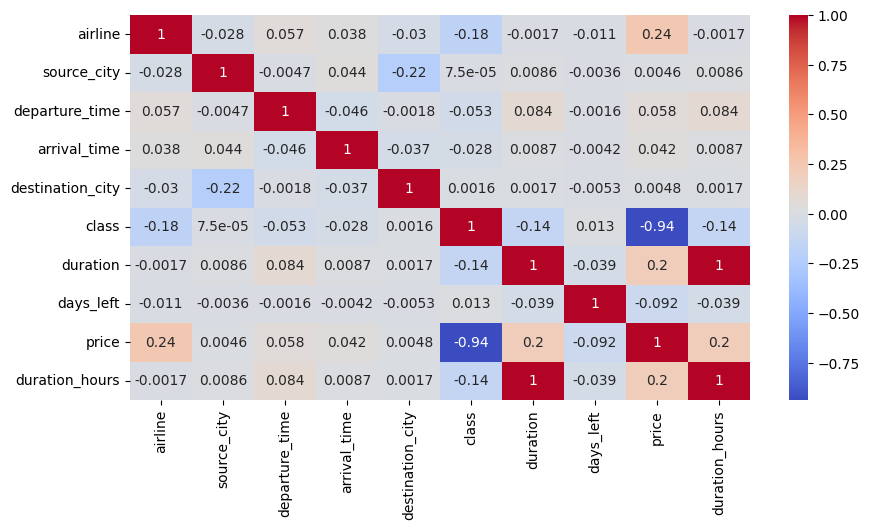

In [ ]:
plt.figure(figsize=(10, 5))

# Drop the 'flight' column from the DataFrame before calculating the correlation matrix
data_without_flight = data.drop(columns=['flight'])

# Plot the correlation matrix
sns.heatmap(data_without_flight.corr(), annot=True, cmap='coolwarm')
plt.show()



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i)
                      for i in range(len(x.columns))]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration       inf
7         days_left  3.950132
8    duration_hours       inf


In [ ]:
data = data.drop(columns=['stops'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                    for i in range(len(x.columns))]
print(vif_data)

KeyError: "['stops'] not found in axis"

### **LINEAR REGRESSION**

In [ ]:
x = data.drop(columns=['price', 'flight'])
y = data['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Actual_Value', 'Predicted_Value'])
difference.head()

,Actual_Value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596


In [ ]:
from logging import root
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
mean_abs_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print(mean_sq_error)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_sq_error)

0.9746412378084918
1217.8107644383736
13071992.389371045
3615.5210398186105


<ipython-input-58-01dfa627d7b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual')
<ipython-input-58-01dfa627d7b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted')


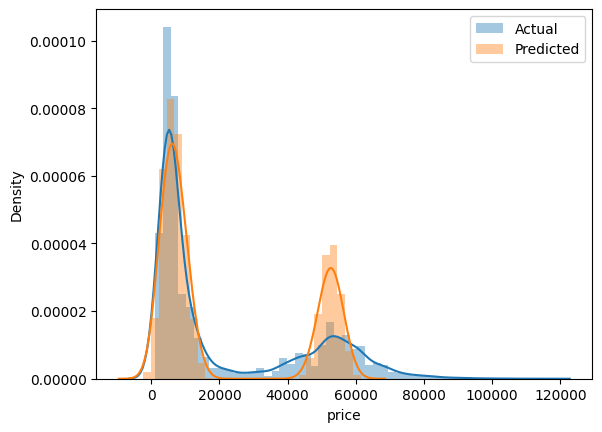

In [ ]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()
plt.show()

### **DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("r2_score:",r2_score(y_test, y_pred))
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print('mean_abs_error:',mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print('mean_sq_error:',mean_sq_error)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('root_mean_sq_error:',root_mean_sq_error)

r2_score: 0.9746685337333958
mean_abs_error: 1218.2180956505806
mean_sq_error: 13057921.82394235
root_mean_sq_error: 3613.5746600758575


### **RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("r2_score:",r2_score(y_test, y_pred))
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print('mean_abs_error:',mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print('mean_sq_error:',mean_sq_error)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('root_mean_sq_error:',root_mean_sq_error)

r2_score: 0.9844699705793424
mean_abs_error: 1125.159121714399
mean_sq_error: 8005454.874352087
root_mean_sq_error: 2829.3912550851087


<ipython-input-61-01dfa627d7b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual')
<ipython-input-61-01dfa627d7b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted')


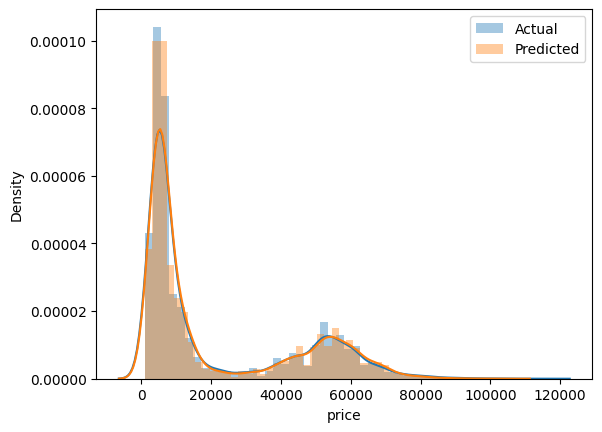

In [ ]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()
plt.show()